In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 200

In [2]:
%matplotlib inline

cols = ['XOM', 'GE', 'CVX']

df = None
for col in cols:
    sub = pd.read_csv('itch/{}.csv'.format(col), index_col=0)
    item = pd.DataFrame(sub['last'])
    item.columns = [col]
    
    if df is None:
        df = item
    else:
        df = df.append(item)
    
df = df.fillna(method='ffill').dropna()

step = 0.1
start = 39600  # 11am
end = 40800    # 11:20am
df2 = {}
for time in np.arange(start, end + step, step):
    sub = df[df.axes[0] <= time]
    df2[time] = sub.iloc[-1]
    
df2 = pd.DataFrame(df2).transpose()
    
# print(len(df))
# print(len(df2))
# print(df2)

%matplotlib inline
# df2['INTC'].plot()
# sub = df[df.axes[0] <= end]
# sub = sub[sub.axes[0] >= start]
# sub['INTC'].plot()

# titles = {i + 1: sec for i, sec in enumerate(cols)}

# recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=False)
# rs = recon.unmeasured(y, plot=True, titles=titles)

# flat = []
# for key, vals in rs.items():
#     for k2, lst in vals.items():
#         flat.append(list(lst))

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 4.192 Seconds
Building M ...
	Done. Took 6.101 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 7.985
	Done. Took 80.451 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) XOM <-- GE: 3.112*(0.020)^t + 1.809*(0.015)^t + 9.416*(0.016)^t + -1.465*(-0.053)^t + -12.873106 * delta(t,0)
		RMSE = 0.000
		Matlab: [ 3.11  0.02  1.81  0.01  9.42  0.02 -1.46 -0.05]
	Done. Took 82.801 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) XOM <-- CVX: -0.203*(0.291)^t + -8.532*(-0.063)^t + 1.696*(0.076)^t + 8.999*(0.067)^t + -1.959556 * delta(t,0)
		RMSE = 0.000
		Matlab: [-0.2   0.29 -8.53 -0.06  1.7   0.08  9.    0.07]
	Done. Took 81.470 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1) GE <-- XOM: -1.258*(0.013)^t + -0.061*(0.682)^t + 1.135*(-0.000)^t + 3.582*(0.044)^t + -3.398473 * delta

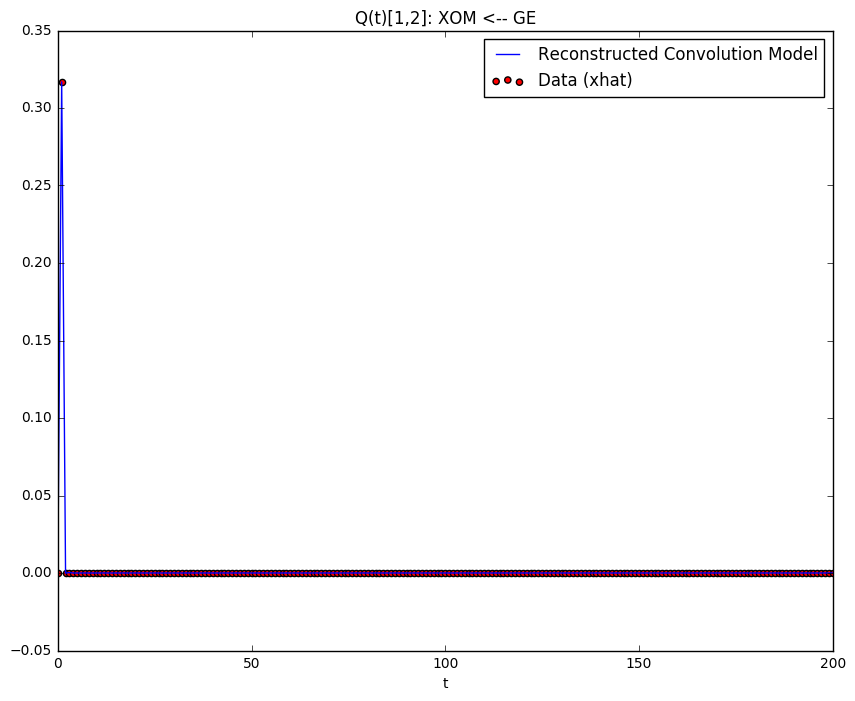

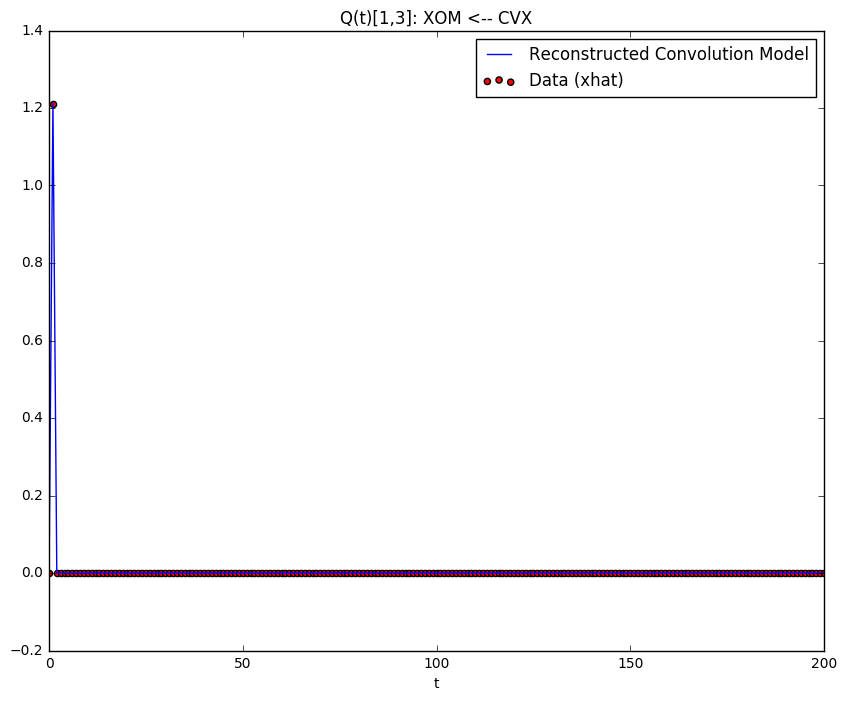

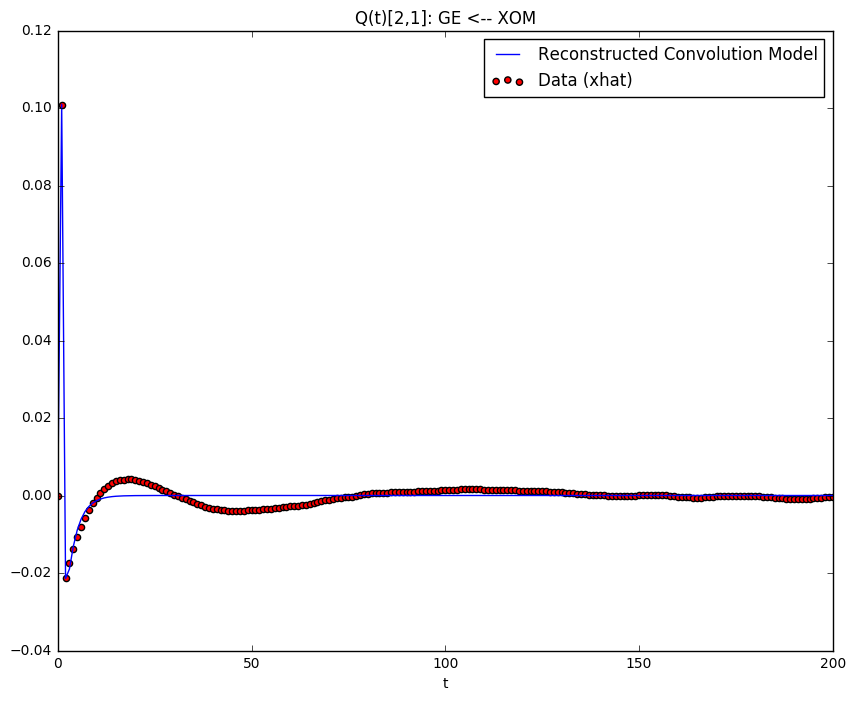

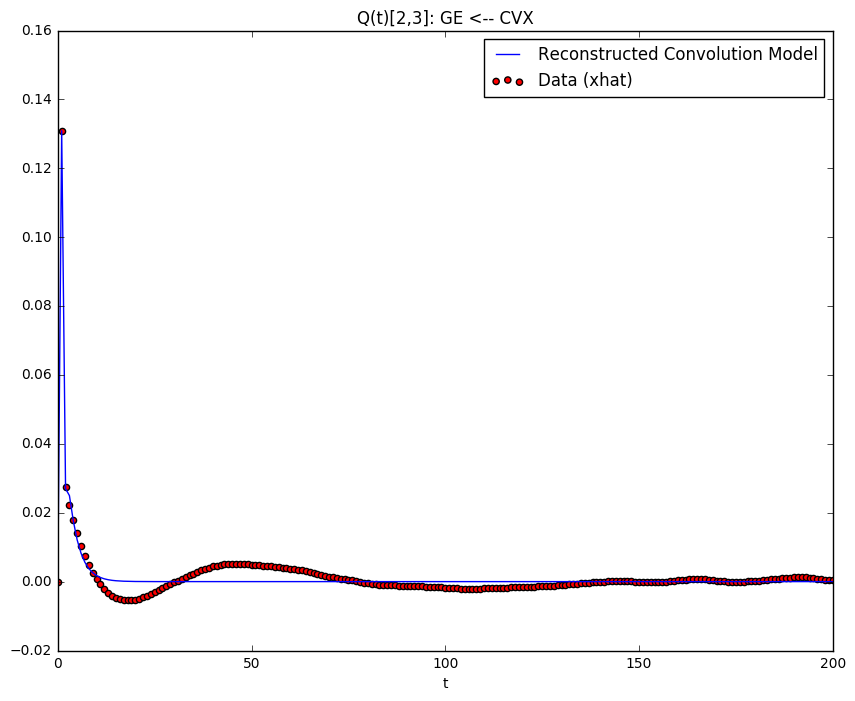

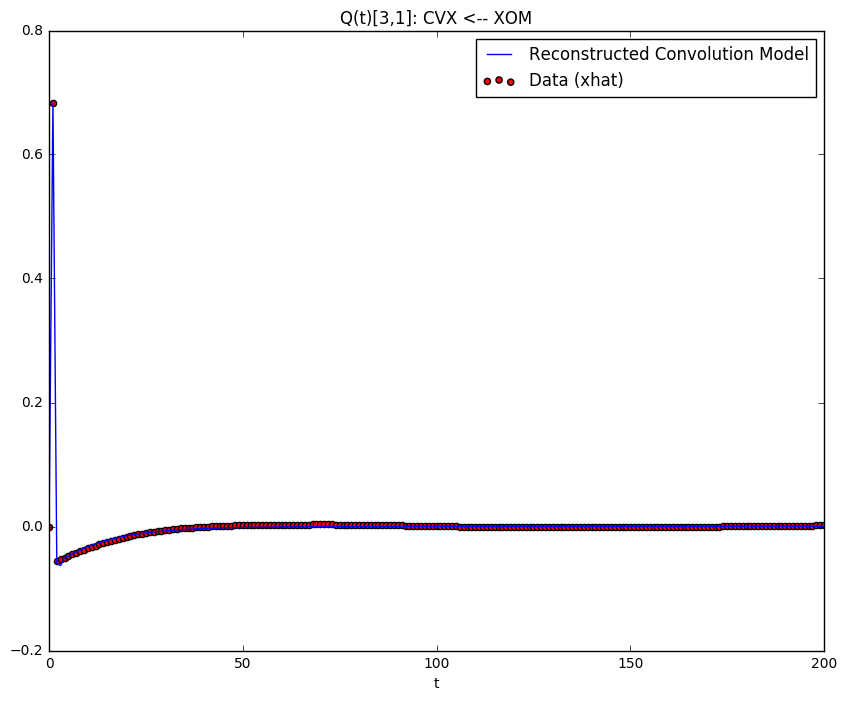

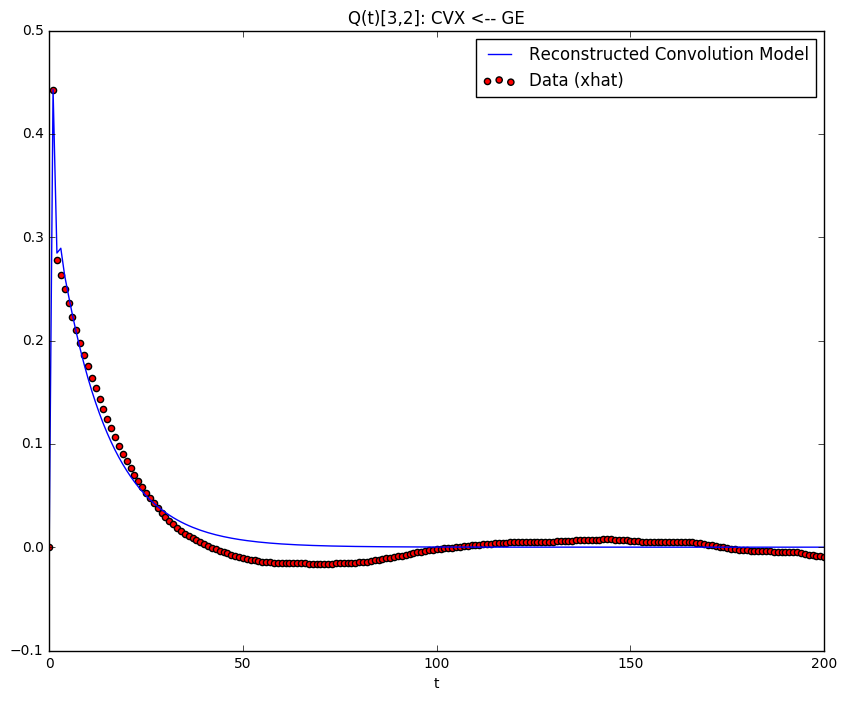

In [3]:
y = df2.values
titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=False)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [4]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([3.11201993672 0.0203273738909 1.80932463166 0.0146058713589 9.41627281093 0.0158870451252 -1.46451175661 -0.052961005268 ; -0.203154605682 0.291396008901 -8.53177652614 -0.0626714811354 1.69579148085 0.0762955925737 8.99869535407 0.0674155652001 ; -1.25751456658 0.013094198386 -0.0607242884608 0.682260113535 1.13517471106 -0.000310149762752 3.58153715091 0.0444396985197 ; -2.44377196781 -0.0248063472681 0.0839062638801 0.679061576122 -0.336788955001 0.160078476374 -2.89009640532 -0.0232554364384 ; -9.83226488697 -0.0544209982386 -9.90729126529 -0.0557728752928 -0.0700152908256 0.92609755335 1.91788856136 -0.1772576489 ; 0.361670786242 0.923791923633 1.24228993224 -0.0391252742485 -0.996090997865 -0.1622222354 0.0616712428086 -0.0691298721477], {'XOM', 'GE', 'CVX'});


Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 4.457 Seconds
Building M ...
	Done. Took 6.131 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...


/home/nwoodbury/.virtualenvs/netreco/lib/python3.5/site-packages/scikit_learn-0.18-py3.5-linux-x86_64.egg/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.759e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.224e-08
  ConvergenceWarning)
/home/nwoodbury/.virtualenvs/netreco/lib/python3.5/site-packages/scikit_learn-0.18-py3.5-linux-x86_64.egg/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.407e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.689e-08
  ConvergenceWarning)
/home/nwoodbury/.virtualenvs/netreco/lib/python3.5/site-packages/scikit_learn-0.18-py3.5-linux-x86_64.egg/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 it

	Finished in 6 iterations
	Done. Took 1.044 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) XOM <-- GE: -0.088*(-0.003)^t + 1.306*(-0.002)^t + 0.499*(0.001)^t + -0.618*(-0.003)^t + -1.098664 * delta(t,0)
		RMSE = 0.000
		Matlab: [-0.09 -0.    1.31 -0.    0.5   0.   -0.62 -0.  ]
	Done. Took 88.138 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) XOM <-- CVX: 5.021*(-0.096)^t + 7.220*(0.035)^t + -3.332*(-0.103)^t + 1.789*(0.065)^t + -10.697608 * delta(t,0)
		RMSE = 0.000
		Matlab: [ 5.02 -0.1   7.22  0.03 -3.33 -0.1   1.79  0.07]
	Done. Took 82.230 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1) GE <-- XOM: 5.311*(0.017)^t + -1.311*(0.032)^t + -2.224*(0.071)^t + -1.612*(-0.080)^t + -0.163906 * delta(t,0)
		RMSE = 0.000
		Matlab: [ 5.31  0.02 -1.31  0.03 -2.22  0.07 -1.61 -0.08]
	Done. Took 82.281 Seconds
Learning Convolution for Q(2,3) ...
	Q(2,3) GE <-- CVX: 9.931*(-0.033)^t + 7.867*(-0.046)^t + -0.861*(-0.134)^t + -1.492*(0.088)^t

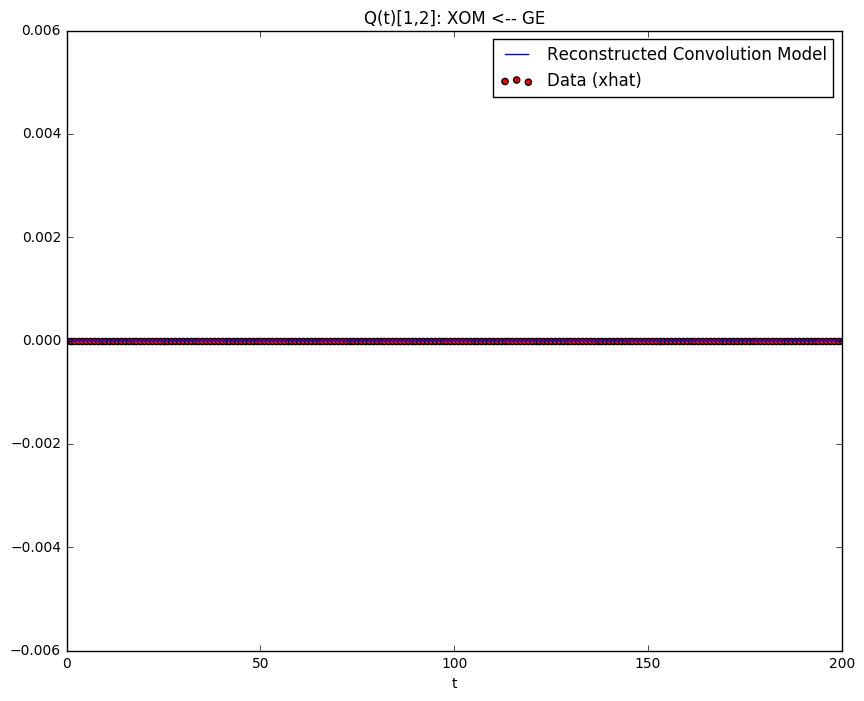

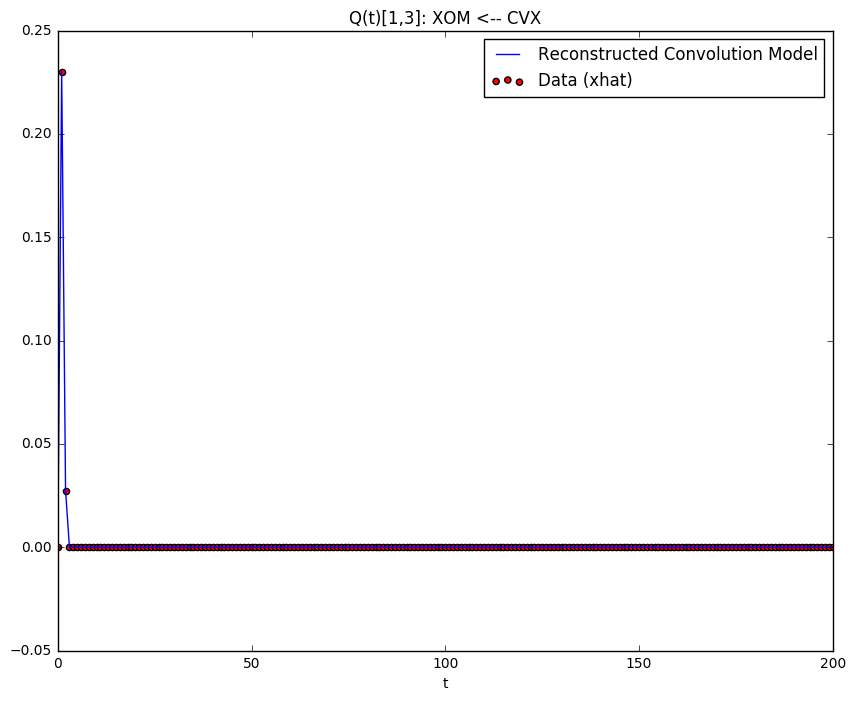

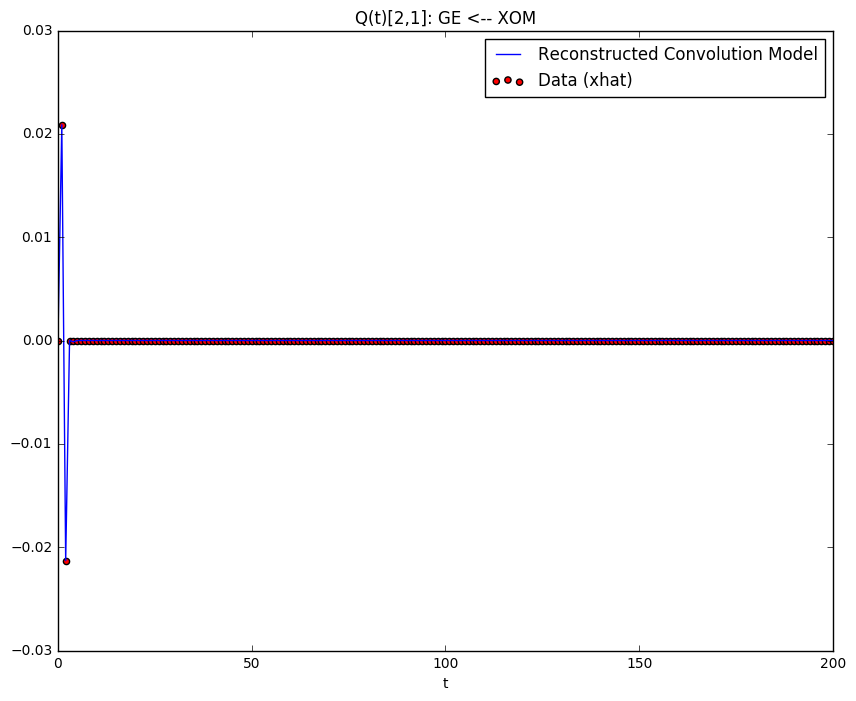

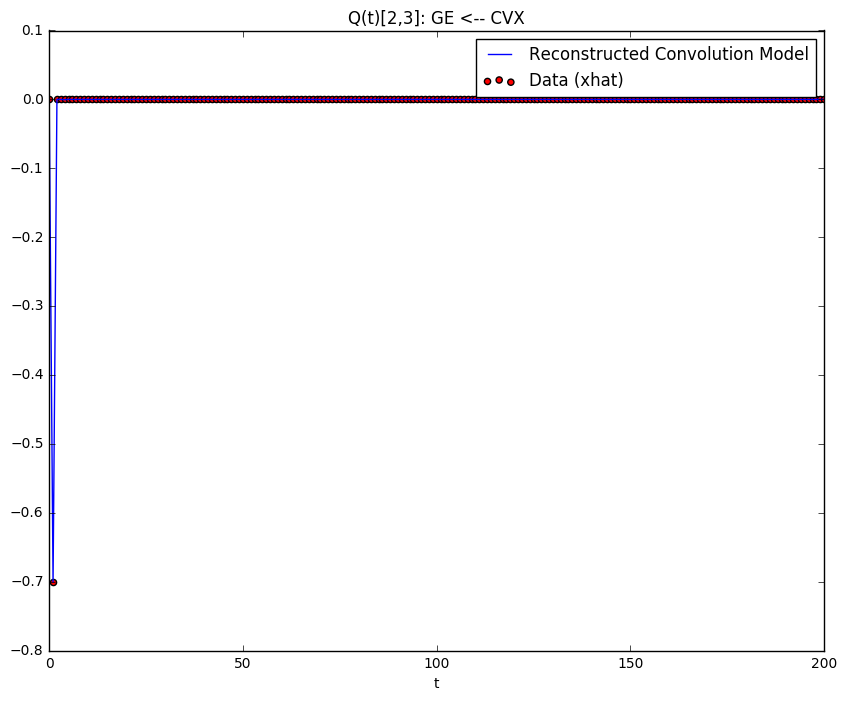

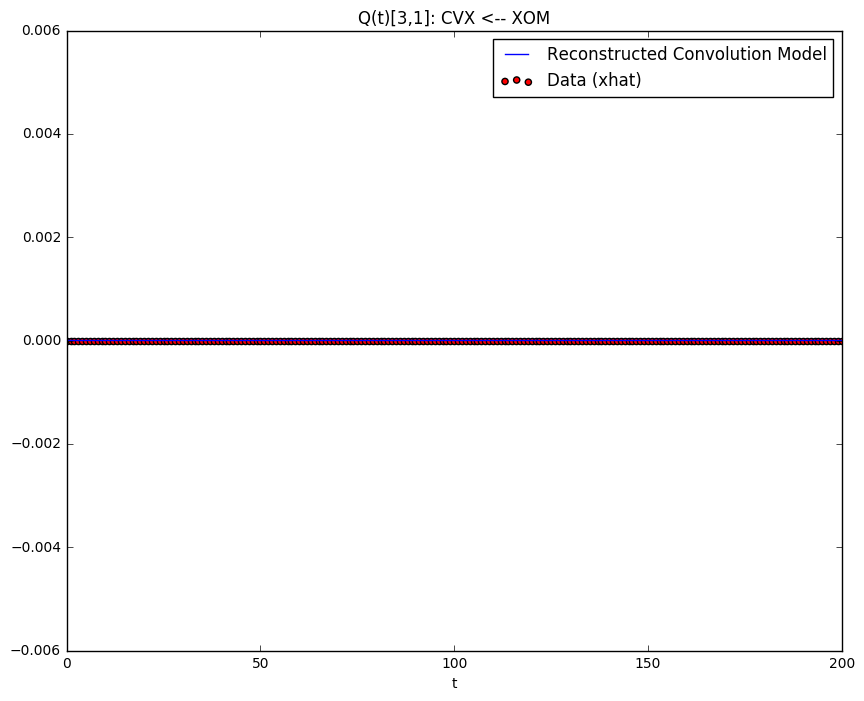

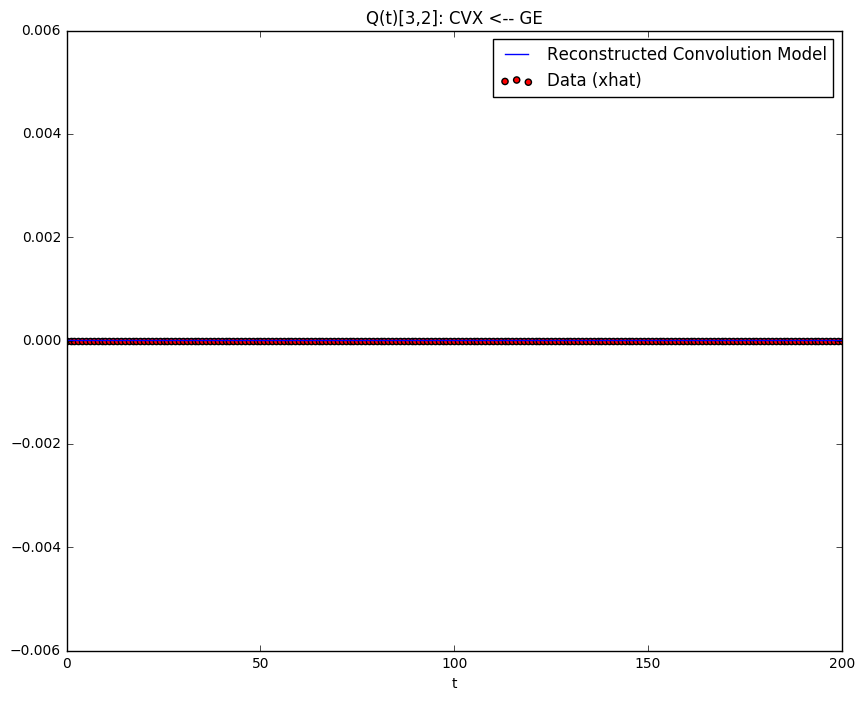

In [7]:
y = df2.values
titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=True)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [8]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([-0.0884221334213 -0.00291325596987 1.30627171378 -0.00220164347588 0.498955409526 0.00117860186036 -0.61814120596 -0.00328449209997 ; 5.02075508277 -0.096013460377 7.22002672584 0.0348656940239 -3.33216175314 -0.103025591391 1.78898805529 0.0654504457855 ; 5.31101065398 0.0174638365964 -1.31127304583 0.0323201421393 -2.22365593037 0.0711750496481 -1.61217616349 -0.079877967276 ; 9.93083794878 -0.0327146256558 7.86710066426 -0.0457740335541 -0.860675957689 -0.134047381106 -1.49182632112 0.0881737038324 ; -0.0783844983629 -0.0108789995248 -0.120873453653 0.00403613106246 0.0833477938943 -0.00882455108531 0.0286976041127 0.0129146144264 ; -0.00744132284542 0.00682999159512 2.51306232001 0.000202449618609 0.0189764000623 -0.0124638719547 -0.0211052727448 0.0104920426831], {'XOM', 'GE', 'CVX'});
